In [2]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------------------------ --- 7.3/8.1 MB 37.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 31.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 27.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ----------------------- ---------------- 7.3/12.6 MB 36.0 MB/s eta 0:00:01
   ---------------------------------------  12.6/12.6 MB 34.5 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 30.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 26.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


# 해시 시뮬레이션 시각화

In [4]:
pip install koreanize_matplotlib

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ----------------------------------- ---- 7.1/7.9 MB 38.5 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 32.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [5]:
import koreanize_matplotlib

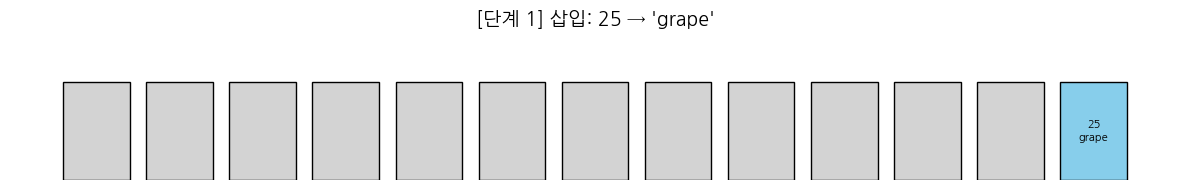

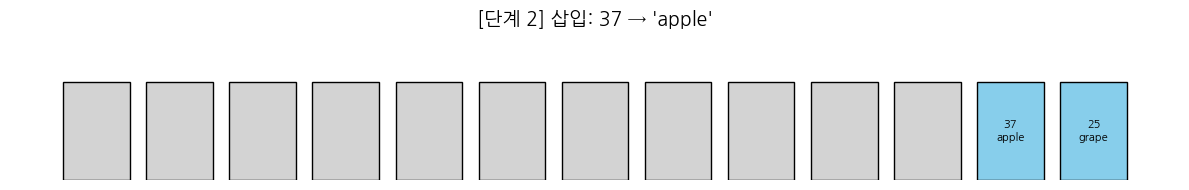

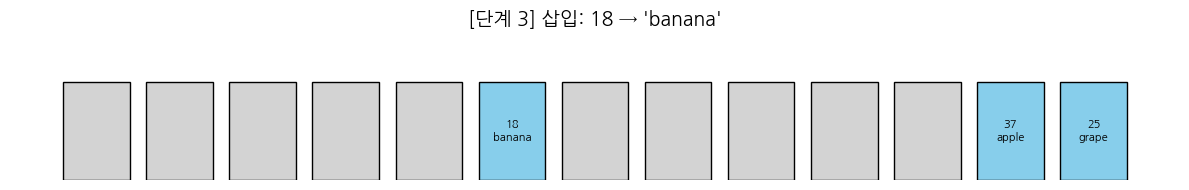

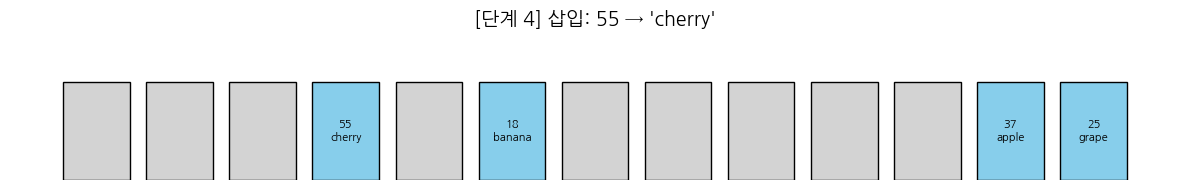

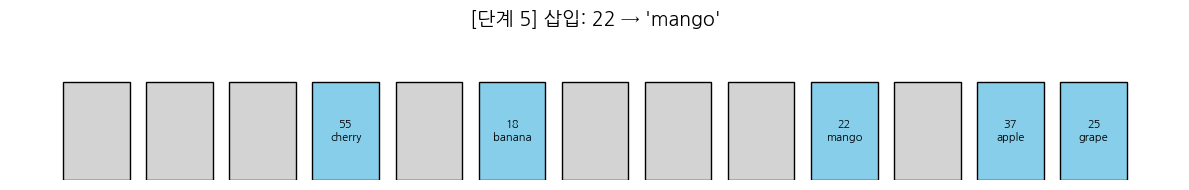

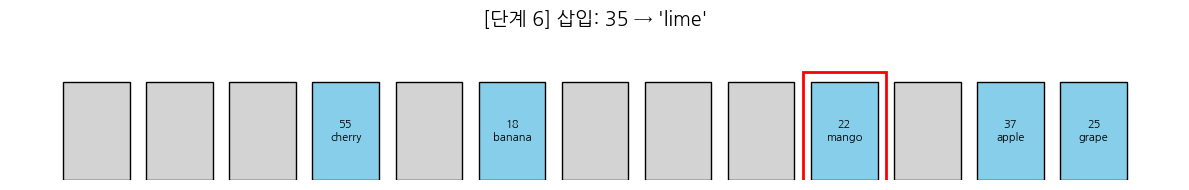

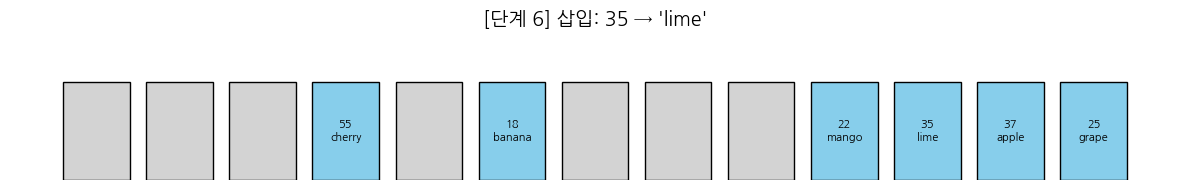

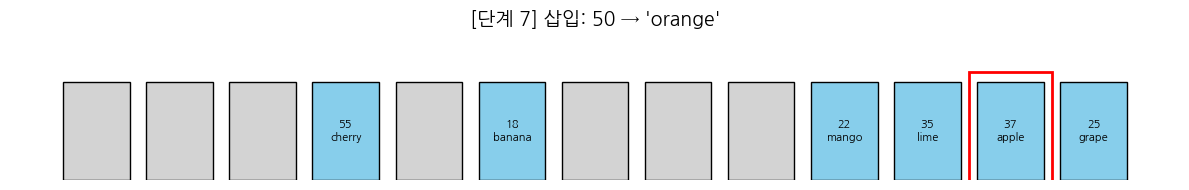

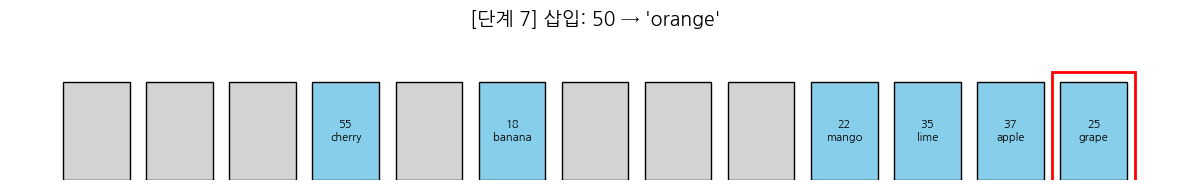

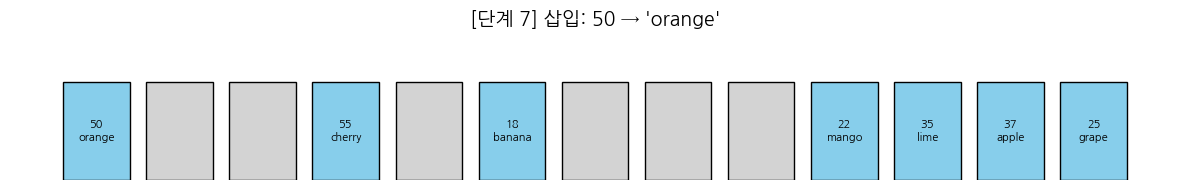

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 삽입 단계별 시뮬레이션
simulation_steps = [
    (25, 'grape'),     # 25 % 13 = 12
    (37, 'apple'),     # 37 % 13 = 11
    (18, 'banana'),    # 18 % 13 = 5
    (55, 'cherry'),    # 55 % 13 = 3
    (22, 'mango'),     # 22 % 13 = 9
    (35, 'lime'),      # 35 % 13 = 9 -> 충돌 -> 10
    (50, 'orange')     # 50 % 13 = 11 -> 충돌 -> 12 -> 충돌 -> 0
]

# 해시 테이블 초기화
table_size = 13
keys = [None] * table_size
data = [None] * table_size

# 시각화 함수
def plot_table(step, key, val, probe_index=None):
    fig, ax = plt.subplots(figsize=(12, 2))
    bars = ax.bar(range(table_size), [1] * table_size,
                  color=['lightgray' if k is None else 'skyblue' for k in keys],
                  edgecolor='black', tick_label=list(range(table_size)))

    for idx in range(table_size):
        label = f"{keys[idx]}\n{data[idx]}" if keys[idx] is not None else ""
        ax.text(idx, 0.5, label, ha='center', va='center', fontsize=8)

    # 충돌 후 조사 위치 표시
    if probe_index is not None:
        rect = patches.Rectangle((probe_index - 0.5, -0.1), 1, 1.2,
                                 linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

    ax.set_ylim(0, 1.5)
    ax.set_title(f"[단계 {step+1}] 삽입: {key} → '{val}'", fontsize=14)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# 시뮬레이션 단계별 실행 및 시각화
for step, (k, v) in enumerate(simulation_steps):
    h = k % table_size
    i, j = h, 0
    while True:
        if keys[i] is None:
            keys[i] = k
            data[i] = v
            plot_table(step, k, v)
            break
        else:
            plot_table(step, k, v, probe_index=i)
            j += 1
            i = (h + j) % table_size
